In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from tqdm import tqdm
corpus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SSAC/음식점_train.csv')
corpus

,IDX,발화자,발화문,카테고리,QA번호,QA여부,감성,인텐트,가격,수량,크기,장소,조직,사람,시간,날짜,상품명,상담번호,상담내순번
0,1,c,"참치타다끼샐러드는 취소했었는데, 맞죠?",음식점,32365,q,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,참치타다끼샐러드,32365,1
1,2,s,"네, 참치타다끼샐러드는 취소된 상태입니다.",음식점,32365,a,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,참치타다끼샐러드,32365,2
2,3,c,주문한 메뉴 취소할 때 주문서만 있으면 된다는 말씀이세요?,음식점,15016,q,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15016,1
3,4,s,"네, 주문서만 있으면 취소 가능합니다.",음식점,15016,a,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15016,2
4,5,c,고객서비스가 엉망이군요. 그냥 갑니다.,음식점,62984,q,n,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290382,290383,s,성북동까지 지금 시간에는 40분 이상 걸립니다.,음식점,50614,a,m,배송_날짜_요청,NaN,NaN,NaN,성북동,NaN,NaN,NaN,NaN,NaN,50614,2
290383,290384,c,짜장면 지금 주문하면 바로 배달 올 수 있죠?,음식점,18579,q,m,배송_날짜_요청,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,짜장면,18579,1
290384,290385,s,"네, 지금 주문하시면 바로 배달 갑니다.",음식점,18579,a,m,배송_날짜_요청,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18579,2
290385,290386,c,롯데유치원에 피자 20판 보내야하는데 5시까지 될까요?,음식점,59570,q,m,배송_날짜_요청,NaN,NaN,NaN,롯데유치원,NaN,NaN,5시,NaN,피자,59570,1


In [6]:
Q = []
A = []
flag = 0
for i in tqdm(range(len(corpus))):
  if flag > i :
    pass
  else :
    if corpus.iloc[i]['QA여부'] == 'q':
      list_q = []
      list_q.append(corpus.iloc[i]['발화문'])
      for j in range(i+1, len(corpus)):
        if corpus.iloc[j]['QA여부'] == 'a':
          flag = j
        if flag == j:
          break
        else : 
          list_q.append(corpus.iloc[j]['발화문'])
      Q.append(' '.join(list_q))
    else :
      list_a = []
      list_a.append(corpus.iloc[i]['발화문'])
      for j in range(i+1, i+50):
        try : 
          if corpus.iloc[j]['QA여부'] == 'q':
            flag = j

          if flag == j:
            break
          else : 
            list_a.append(corpus.iloc[j]['발화문'])
        except :
          pass
      A.append(' '.join(list_a))

100%|██████████| 290387/290387 [02:20<00:00, 2069.25it/s]


In [7]:
corpus = pd.DataFrame({'Q':Q,
                           'A':A})
corpus

,Q,A
0,"참치타다끼샐러드는 취소했었는데, 맞죠?","네, 참치타다끼샐러드는 취소된 상태입니다."
1,주문한 메뉴 취소할 때 주문서만 있으면 된다는 말씀이세요?,"네, 주문서만 있으면 취소 가능합니다."
2,고객서비스가 엉망이군요. 그냥 갑니다.,원하시는 서비스를 제공하지못해 죄송합니다.
3,방금 전에 홍합탕 주문한 거 지금 취소 가능한 거 맞죠?,"네, 주문하신 홍합탕은 아직 조리 전이라 취소 가능합니다."
4,"매운무뼈닭발 롯데주유소로 주문한 거 아직 안받았는데, 취소해도 되는 거죠?","아니요, 이미 접수 후 조리 시작하여 취소는 어렵습니다."
...,...,...
119372,짜장면 12:30까지 배달되야 먹는데 그 시간까지 오실 수 있나요?,"네, 말씀하신 시간까지 배달해 드릴게요."
119373,후라이드 5마리 시킨 곳인데 배달 출발한 거 확실해요?,"네, 배달 출발한 건지 알아 보고 연락 드리겠습니다."
119374,성북동까지 치킨 배달시키면 얼마나 걸리는지 알려주세요.,성북동까지 지금 시간에는 40분 이상 걸립니다.
119375,짜장면 지금 주문하면 바로 배달 올 수 있죠?,"네, 지금 주문하시면 바로 배달 갑니다."


In [9]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [10]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 459 kB/s 
     |████████████████████████████████| 448 kB 59.5 MB/s 


In [12]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [13]:
Q_len_mean = np.mean(corpus['Q'].str.len()) 
print('Q Text 평균 길이 :',Q_len_mean)

A_len_mean = np.mean(corpus['A'].str.len()) 
print('A Text 평균 길이 :',A_len_mean)

Q Text 평균 길이 : 23.668922824329645
A Text 평균 길이 : 17.842859177228444


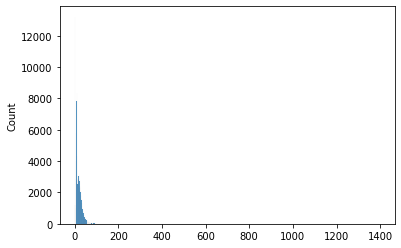

In [24]:
import seaborn as sns

document = corpus['A']
string_len = [len(x) for x in document]

sns.histplot(data=string_len)

In [25]:
np.max(string_len)

1396

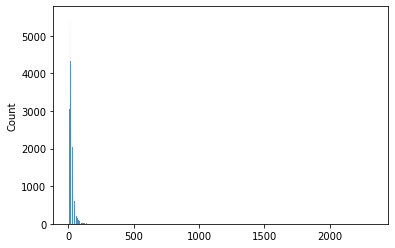

In [26]:
document = corpus['Q']
string_len = [len(x) for x in document]

sns.histplot(data=string_len)

In [27]:
np.max(string_len)

2330

In [28]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        font_path = font_path,
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [33]:
document = df2str(corpus['Q']) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:10] 

[('얼마', 18498),
 ('주문', 12491),
 ('배달', 8551),
 ('포장', 7630),
 ('세트', 7615),
 ('하나', 7074),
 ('추가', 6386),
 ('치킨', 5398),
 ('메뉴', 5223),
 ('예약', 5104)]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


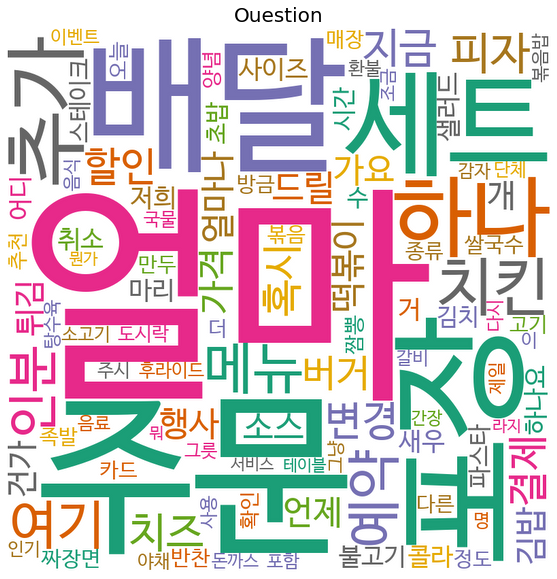

In [34]:
total_text = visualize(noun_list,'Ouestion') # 워드클라우드 시각화

In [35]:
document = df2str(corpus['A']) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:10] 

[('네', 12675),
 ('주문', 6528),
 ('네네', 3998),
 ('추가', 3844),
 ('배달', 3711),
 ('메뉴', 3607),
 ('포장', 2679),
 ('예약', 2665),
 ('저희', 2662),
 ('인분', 2588)]

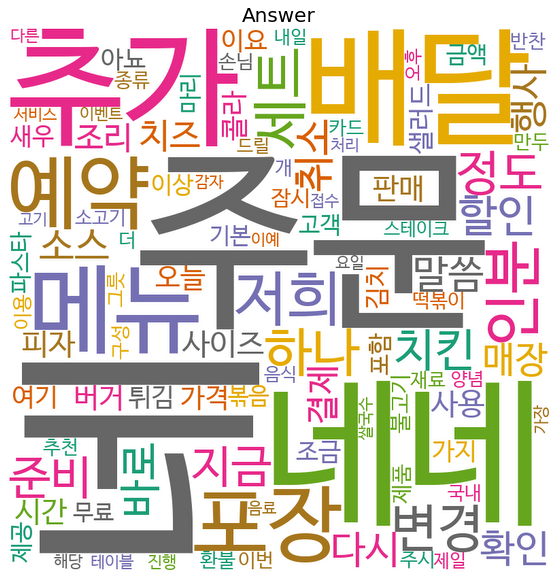

In [36]:
total_text = visualize(noun_list,'Answer') # 워드클라우드 시각화